In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
consump_climate = pd.read_csv("Consumption_Climate_Average_West_Bengal_2018_2019_2020.csv")
consump_climate["Date"] = pd.to_datetime(consump_climate["Date"])
consump_climate.set_index("Date", inplace = True)
consump_climate.drop("avg_temp", axis = 1, inplace = True) #Dropping Avg_Temp as it is redundant
consump_climate.head()

,Consumption,avg_max,avg_min,avg_rain
Date,,,,
2018-01-01,87.3,23.775773,11.385371,0.0
2018-01-02,87.9,23.422979,11.027654,0.0
2018-01-03,92.1,21.428075,10.351028,0.0
2018-01-04,96.6,20.518272,9.465577,0.0
2018-01-05,98.5,21.488783,8.556001,0.0


In [4]:
consump_climate.corr()

,Consumption,avg_max,avg_min,avg_rain
Consumption,1.000000,0.774386,0.803968,0.222968
avg_max,0.774386,1.000000,0.882739,0.198494
avg_min,0.803968,0.882739,1.000000,0.451281
avg_rain,0.222968,0.198494,0.451281,1.000000


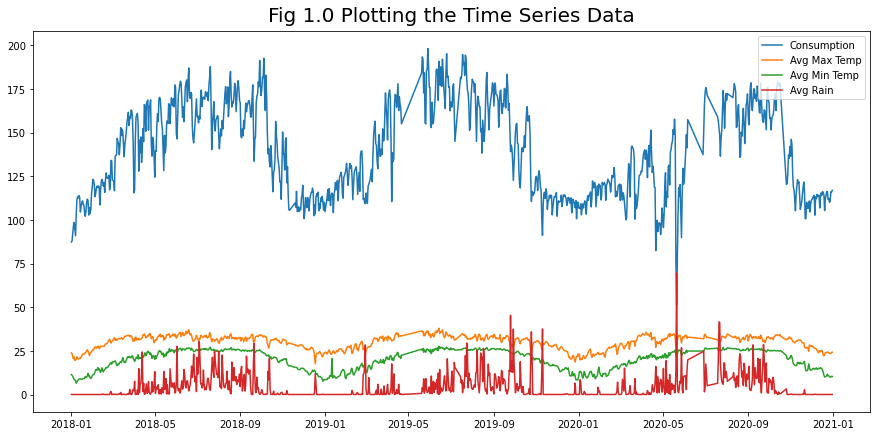

In [5]:
plt.figure(figsize = (15, 7))
plt.title('Fig 1.0 Plotting the Time Series Data',fontsize=20,pad=10)
plt.plot(consump_climate.index, consump_climate["Consumption"],label='Consumption')
plt.plot(consump_climate.index, consump_climate["avg_max"],label='Avg Max Temp')
plt.plot(consump_climate.index, consump_climate["avg_min"],label='Avg Min Temp')
plt.plot(consump_climate.index, consump_climate["avg_rain"],label='Avg Rain')
plt.legend(loc="upper right")

In [6]:
#Splitting the dataset
rows=len(consump_climate)
tr_size=int(rows*0.5)
vd_size=int(rows*0.2)

train_climate= consump_climate[:tr_size]
valid_climate= consump_climate[tr_size:tr_size+vd_size]
test_climate= consump_climate[tr_size+vd_size:]

print(consump_climate.shape)
print(train_climate.shape)
print(valid_climate.shape)
print(test_climate.shape)

(1005, 4)
(502, 4)
(201, 4)
(302, 4)


In [7]:
tr_X=train_climate[['avg_max', 'avg_min', 'avg_rain']].values.T
print(tr_X.shape)
Y = train_climate[['Consumption']].values[:, np.newaxis].reshape(len(train_climate),1)
print(Y.shape)

(3, 502)
(502, 1)


In [8]:
#Function to create design matrix of order 'deg'
def polynomial_combi(mat, deg):
    
    design=np.ones((1,mat.shape[1]))
    for k in range(1,deg+1):
        rows=int((k**2+3*k+2)/2)
        combi = np.zeros((rows, mat.shape[1]))
        c=0
        
        for i in range(k+1):
            for j in range(k+1-i):
                combi[c,:]=np.power(mat[0,:],i)*np.power(mat[1,:],j)*np.power(mat[2,:],k-i-j)
                c+=1
                
        design=np.vstack((design,combi))
        
    return design

# Linear Least Squares Regression

In [17]:
tr_X=train_climate[['avg_max', 'avg_min', 'avg_rain']].values
tr_X.shape

i1=np.ones((len(train_climate),1))

X = np.hstack([i1,tr_X]).T
print(X.shape)
Y = train_climate[['Consumption']].values[:, np.newaxis].reshape(len(train_climate),1)
print(Y.shape)

(4, 502)
(502, 1)


In [83]:
# Direct least square regression
w = np.dot((np.dot(np.linalg.inv(np.dot(X,X.T)),X)),Y)
print(w.shape)

Y_pred = np.dot(w.T,X).T
print(Y_pred.shape)

train_climate=train_climate.assign(Predicted_Consumption=Y_pred)
train_climate.head()

(4, 1)
(502, 1)


,Consumption,avg_max,avg_min,avg_rain,Predicted_Consumption
Date,,,,,
2018-01-01,87.3,23.775773,11.385371,0.0,108.840172
2018-01-02,87.9,23.422979,11.027654,0.0,107.140786
2018-01-03,92.1,21.428075,10.351028,0.0,101.408801
2018-01-04,96.6,20.518272,9.465577,0.0,97.133048
2018-01-05,98.5,21.488783,8.556001,0.0,96.353550


In [84]:
rmse=np.power(np.sum((Y-Y_pred)**2)/502,0.5)
print("Root mean square error ",rmse)
rsq=1-np.sum((Y-Y_pred)**2)/np.sum((Y-np.mean(Y))**2)
print("R-squared ",rsq)

Root mean square error  10.793189601670935
R-squared  0.8183741328275556


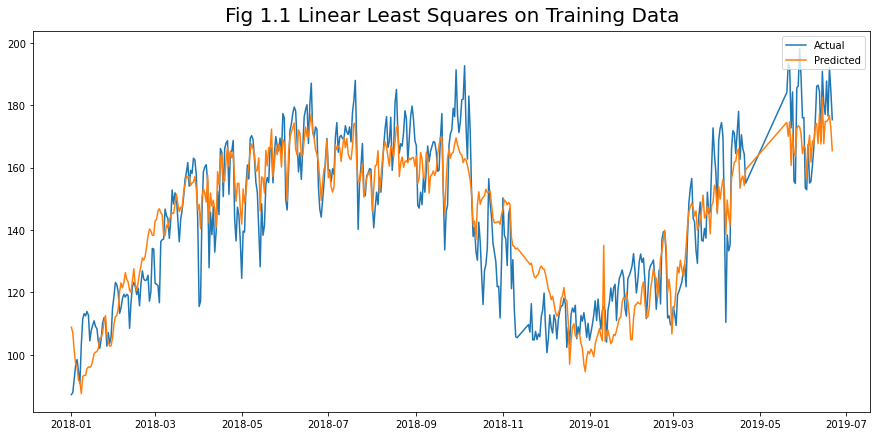

In [11]:
# plot the results
plt.figure(figsize = (15, 7))
plt.title('Fig 1.1 Linear Least Squares on Training Data',fontsize=20,pad=10)
plt.plot(train_climate.index, train_climate["Consumption"],label='Actual')
plt.plot(train_climate.index, train_climate["Predicted_Consumption"],label='Predicted')
plt.legend(loc="upper right")

In [12]:
vd_X=valid_climate[['avg_max', 'avg_min', 'avg_rain']].values
i1=np.ones(len(valid_climate)).reshape(len(valid_climate),1)
vd_X = np.hstack([i1,vd_X]).T
print(vd_X.shape)
vd_Y = valid_climate[['Consumption']].values[:, np.newaxis].reshape(len(valid_climate),1)
print(vd_Y.shape)

(4, 201)
(201, 1)


In [13]:
vd_Y_pred = np.dot(w.T,vd_X).T
#print(vd_Y_pred.shape)
rsq=1-np.sum((vd_Y-vd_Y_pred)**2)/np.sum((vd_Y-np.mean(vd_Y))**2)
print("R-squared ",rsq)
rmse=np.power(np.sum((vd_Y-vd_Y_pred)**2)/201,0.5)
print("Root mean squared eror ",rmse)

R-squared  0.7361841253983245
Root mean squared eror  14.720517745503777


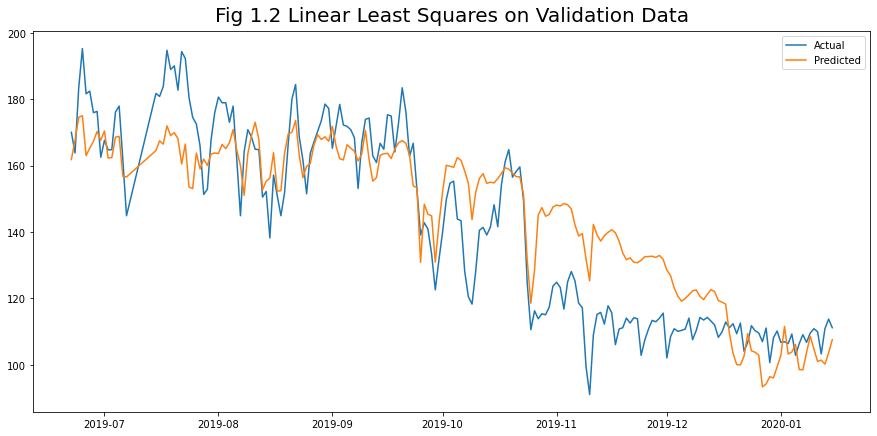

In [18]:
# plot the results
plt.figure(figsize = (15, 7))
plt.title('Fig 1.2 Linear Least Squares on Validation Data',fontsize=20,pad=10)
plt.plot(valid_climate.index, valid_climate["Consumption"],label='Actual')
plt.plot(valid_climate.index, vd_Y_pred,label='Predicted')
plt.legend(loc="upper right")

In [14]:
te_X=test_climate[['avg_max', 'avg_min', 'avg_rain']].values
i1=np.ones(len(test_climate)).reshape(len(test_climate),1)
te_X = np.hstack([i1,te_X]).T
te_Y = test_climate[['Consumption']].values[:, np.newaxis].reshape(len(test_climate),1)

In [15]:
te_Y_pred = np.dot(w.T,te_X).T
#print(te_Y_pred.shape)
rsq=1-np.sum((vd_Y-vd_Y_pred)**2)/np.sum((vd_Y-np.mean(vd_Y))**2)
print("R-squared ",rsq)
rmse=np.power(np.sum((te_Y-te_Y_pred)**2)/302,0.5)
print("Root mean squared error ",rmse)

R-squared  0.7361841253983245
Root mean squared error  21.624210463783555


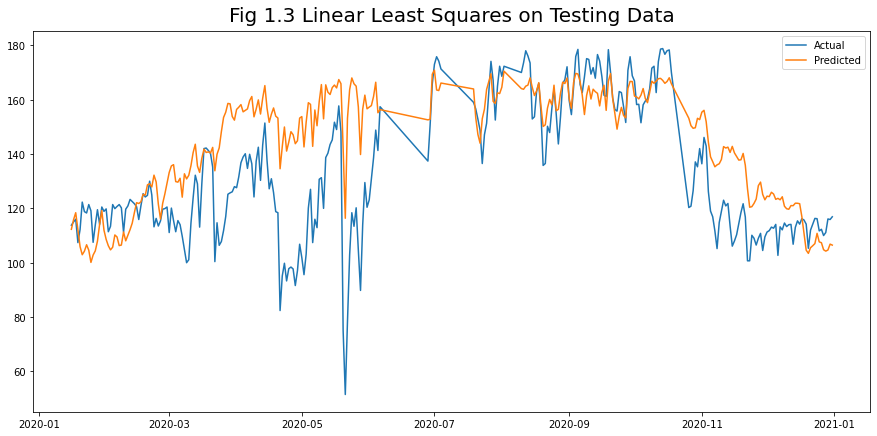

In [19]:
# plot the results
plt.figure(figsize = (15, 7))
plt.title('Fig 1.3 Linear Least Squares on Testing Data',fontsize=20,pad=10)
plt.plot(test_climate.index, test_climate["Consumption"],label='Actual')
plt.plot(test_climate.index, te_Y_pred,label='Predicted')
plt.legend(loc="upper right")

In [13]:
#Generalizing the function for any degree polynomial fit
def ols(tr_X,Y,deg):
    design=polynomial_combi(tr_X.T,deg)
    w = np.dot((np.dot(np.linalg.inv(np.dot(design,design.T)),design)),Y)
    #Y_pred = np.dot(w.T,design).T
    return w, design

In [14]:
tr_X.shape

(3, 502)

In [15]:
Y.shape

(502, 1)

In [80]:
W, D=ols(tr_X,Y,2)
Y_pred = np.dot(W.T,D).T
train_climate=train_climate.assign(Predicted_Consumption=Y_pred)
train_climate.head()

,Consumption,avg_max,avg_min,avg_rain,Predicted_Consumption
Date,,,,,
2018-01-01,87.3,23.775773,11.385371,0.0,108.717264
2018-01-02,87.9,23.422979,11.027654,0.0,108.143739
2018-01-03,92.1,21.428075,10.351028,0.0,104.781360
2018-01-04,96.6,20.518272,9.465577,0.0,104.315438
2018-01-05,98.5,21.488783,8.556001,0.0,107.154828


In [32]:
r2=1-np.sum((Y-Y_pred)**2)/np.sum((Y-np.mean(Y))**2)
print("R-squared for second degree polynomial",r2)
rmse=np.power(np.sum((Y-Y_pred)**2)/tr_X.shape[1],0.5)
print("Root mean squared error",rmse)

R-squared for second degree polynomial 0.8743742849146505
Root mean squared error 116.11583792154832


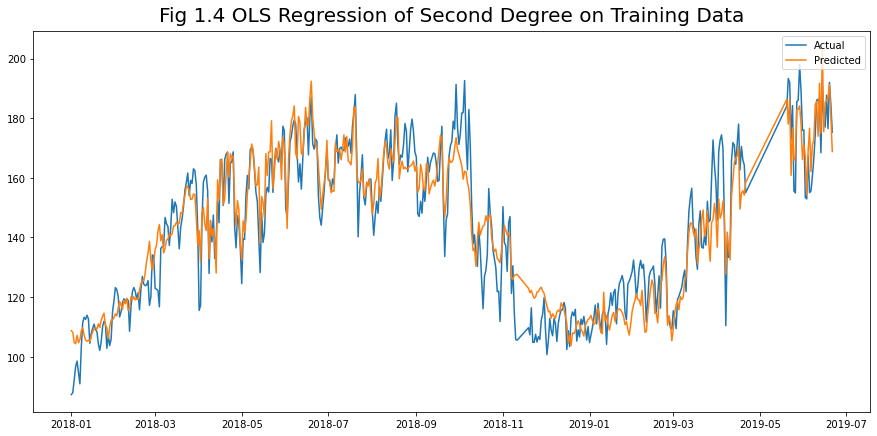

In [34]:
plt.figure(figsize = (15, 7))
plt.title('Fig 1.4 OLS Regression of Second Degree on Training Data',fontsize=20,pad=10)
plt.plot(train_climate.index, train_climate["Consumption"],label='Actual')
plt.plot(train_climate.index, train_climate["Predicted_Consumption"],label='Predicted')
plt.legend(loc="upper right")

In [64]:
tr_X.shape

(502, 3)

In [35]:
#Getting the weights for various degree of the polynomial
w1,d1=ols(tr_X,Y,1)
w2,d2=ols(tr_X,Y,2)
w3,d3=ols(tr_X,Y,3)
w4,d4=ols(tr_X,Y,4)

In [77]:
rat=np.zeros(4)
rmses=np.zeros(4)

for i in range(4):
    W,D=ols(tr_X,Y,i+1)
    Y_pred = np.dot(W.T,D).T
    print(D.shape)
    rat[i]=1-np.sum((Y-Y_pred)**2)/np.sum((Y-np.mean(Y))**2)
    rmses[i]=np.power(np.sum((Y-Y_pred)**2)/tr_X.shape[1],0.5)

(4, 502)
(10, 502)
(20, 502)
(35, 502)


[0.81837413 0.87437428 0.88032269 0.88876532]


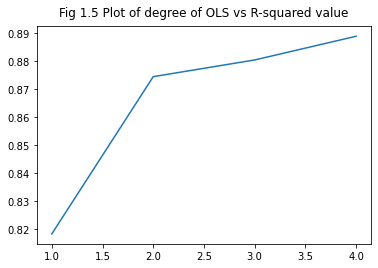

In [48]:
print(rat)
plt.title('Fig 1.5 Plot of degree of OLS vs R-squared value',pad=10)
plt.plot([1,2,3,4], rat)
plt.show()

[139.61787943 116.11583792 113.3334458  109.26279301]


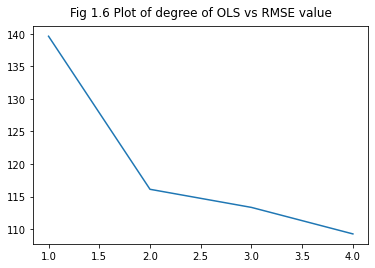

In [47]:
print(rmses)
plt.title('Fig 1.6 Plot of degree of OLS vs RMSE value',pad=10)
plt.plot([1,2,3,4], rmses)
plt.show()

In [90]:
vd_X=valid_climate[['avg_max', 'avg_min', 'avg_rain']].values
print(vd_X.shape)
vd_Y = valid_climate[['Consumption']].values[:, np.newaxis].reshape(len(valid_climate),1)
print(vd_Y.shape)

(201, 3)
(201, 1)


In [83]:
D1=polynomial_combi(vd_X,1)
D2=polynomial_combi(vd_X,2)
D3=polynomial_combi(vd_X,3)
D4=polynomial_combi(vd_X,4)
sz=[D1.shape[0],D2.shape[0],D3.shape[0],D4.shape[0]]
print(sz)

[4, 10, 20, 35]


In [132]:
w1,d1=ols(vd_X,vd_Y,1)
w2,d2=ols(vd_X,vd_Y,2)
w3,d3=ols(vd_X,vd_Y,3)
w4,d4=ols(vd_X,vd_Y,4)

In [108]:
w1.shape

(4, 1)

In [109]:
d1.shape

(4, 201)

In [133]:
vd_Y_pred=np.zeros((vd_X.shape[0],4))
print(vd_Y_pred.shape)

vd_Y_pred[:,0] = np.dot(w1.T,d1).T.reshape(vd_Y.shape[0])
vd_Y_pred[:,1] = np.dot(w2.T,d2).T.reshape(vd_Y.shape[0])
vd_Y_pred[:,2] = np.dot(w3.T,d3).T.reshape(vd_Y.shape[0])
vd_Y_pred[:,3] = np.dot(w4.T,d4).T.reshape(vd_Y.shape[0])

(201, 4)


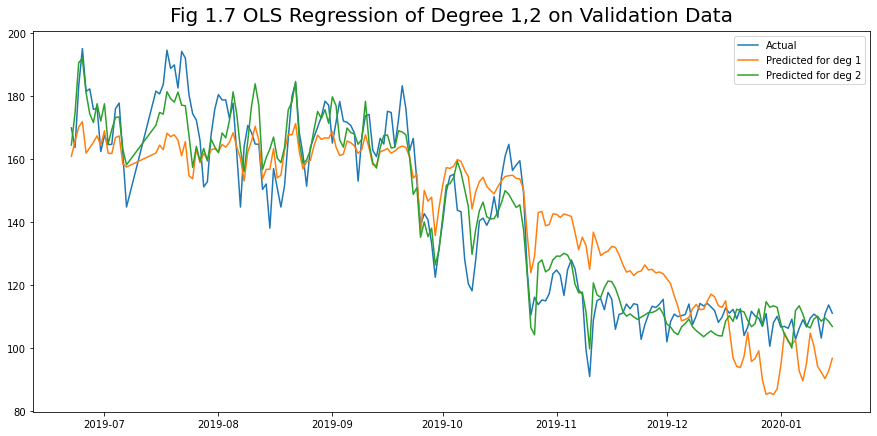

In [134]:
plt.figure(figsize = (15, 7))
plt.title('Fig 1.7 OLS Regression of Degree 1,2 on Validation Data',fontsize=20,pad=10)
plt.plot(valid_climate.index, valid_climate["Consumption"],label='Actual')
plt.plot(valid_climate.index, vd_Y_pred[:,0],label='Predicted for deg 1')
plt.plot(valid_climate.index, vd_Y_pred[:,1],label='Predicted for deg 2')
plt.legend(loc="upper right")

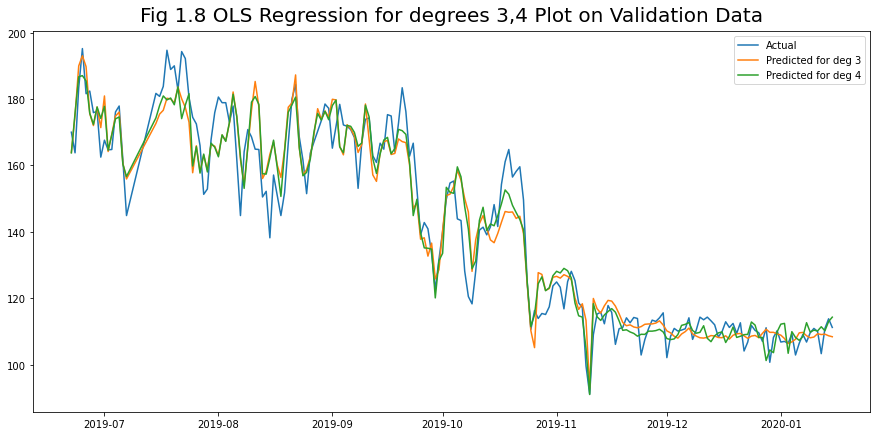

In [136]:
plt.figure(figsize = (15, 7))
plt.title('Fig 1.8 OLS Regression for degrees 3,4 Plot on Validation Data',fontsize=20,pad=10)
plt.plot(valid_climate.index, valid_climate["Consumption"],label='Actual')
plt.plot(valid_climate.index, vd_Y_pred[:,2],label='Predicted for deg 3')
plt.plot(valid_climate.index, vd_Y_pred[:,3],label='Predicted for deg 4')
plt.legend(loc="upper right")

In [137]:
rat=np.zeros(4)
rmses=np.zeros(4)

for i in range(4):

    r2=1-np.sum((vd_Y-vd_Y_pred[:,i])**2)/np.sum((vd_Y-np.mean(vd_Y))**2)
    rat[i]=1-(1-r2)*(vd_Y_pred.shape[0]-1)/(vd_Y_pred.shape[0]-sz[i])
    rmses[i]=np.power(np.sum((vd_Y-vd_Y_pred[:,i])**2)/vd_X.shape[1],0.5)

In [139]:
te_X=test_climate[['avg_max', 'avg_min', 'avg_rain']].values
print(te_X.shape)
te_Y = test_climate[['Consumption']].values[:, np.newaxis].reshape(len(test_climate),1)
print(te_Y.shape)

# Since degree = 4 is gives the highest R-squared value, so we set it as the degree
w,d = ols(te_X,te_Y,4)
te_Y_pred=np.dot(w.T,d).T

rmse1=np.power(np.sum((te_Y-te_Y_pred)**2)/302,0.5)
print("Root Mean Squared Error",rmse1)
rsq=1-np.sum((te_Y-te_Y_pred)**2)/np.sum((te_Y-np.mean(te_Y))**2)
print("R-squared",rsq)

(302, 3)
(302, 1)
Root Mean Squared Error 10.098180854363175
R-squared 0.8335076308260843


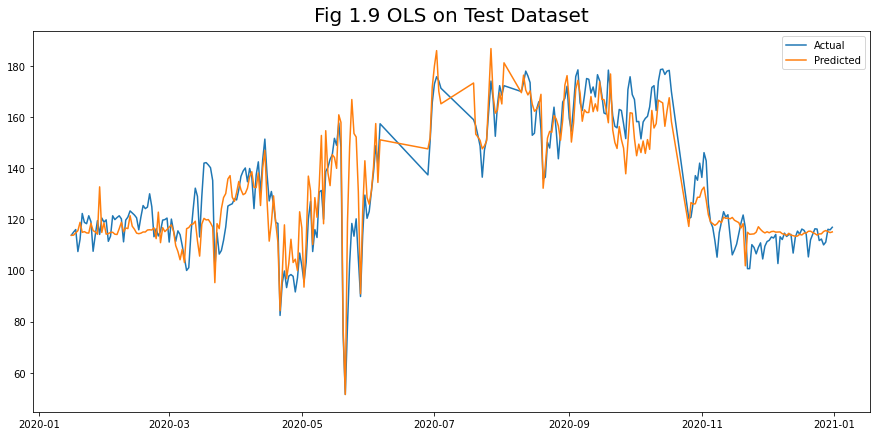

In [144]:
plt.figure(figsize = (15, 7))
plt.title('Fig 1.9 OLS on Test Dataset',fontsize=20,pad=10)
plt.plot(test_climate.index, test_climate["Consumption"],label='Actual')
plt.plot(test_climate.index,te_Y_pred ,label='Predicted')
plt.legend(loc="upper right")

# Linear Least Squares Regression with Ridge Regularization

In [59]:
def ridge_lls(X,Y,lmd):
    w = np.dot((np.dot(np.linalg.inv(lmd*np.eye(4)+np.dot(X,X.T)),X)),Y)
    return w

In [8]:
tr_X=train_climate[['avg_max', 'avg_min', 'avg_rain']].values
tr_X.shape

i1=np.ones((len(train_climate),1))

X = np.hstack([i1,tr_X]).T
print(X.shape)
Y = train_climate[['Consumption']].values[:, np.newaxis].reshape(len(train_climate),1)
print(Y.shape)

(4, 502)
(502, 1)


In [9]:
la=np.linspace(0,1, num=11)
rat=np.zeros(11)
rmses=np.zeros(11)

for i in range(11):
    w=ridge_lls(X,Y,la[i])
    Y_pred = np.dot(w.T,X).T
    rsq=1-np.sum((Y-Y_pred)**2)/np.sum((Y-np.mean(Y))**2)
    rat[i]=rsq
    rmse=np.power(np.sum((Y-Y_pred)**2)/502,0.5)
    rmses[i]=rmse

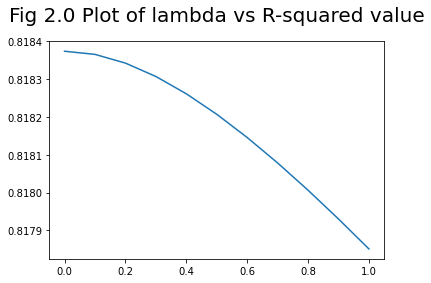

In [10]:
plt.title('Fig 2.0 Plot of lambda vs R-squared value',fontsize=20,pad=20)
plt.plot(la, rat)
plt.show()

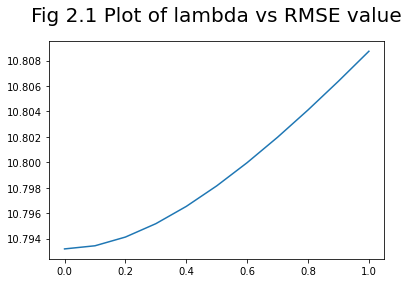

In [11]:
plt.title('Fig 2.1 Plot of lambda vs RMSE value',fontsize=20,pad=20)
plt.plot(la, rmses)
plt.show()

In [150]:
#Choosing lambda to be 0.1
w=ridge_lls(X,Y,0.1)
Y_pred = np.dot(w.T,X).T

In [13]:
rmse=np.power(np.sum((Y-Y_pred)**2)/502,0.5)
print("Root mean square error ",rmse)
rsq=1-np.sum((Y-Y_pred)**2)/np.sum((Y-np.mean(Y))**2)
print("R-squared ",rsq)

Root mean square error  10.808729412224235
R-squared  0.8178507540098203


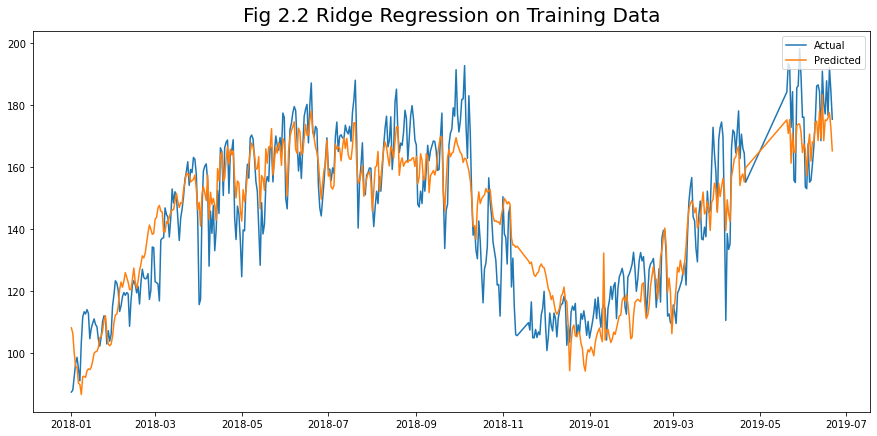

In [14]:
# plot the results
plt.figure(figsize = (15, 7))
plt.title('Fig 2.2 Ridge Regression on Training Data',fontsize=20,pad=10)
plt.plot(train_climate.index, train_climate["Consumption"],label='Actual')
plt.plot(train_climate.index, Y_pred,label='Predicted')
plt.legend(loc="upper right")

In [56]:
vd_X=valid_climate[['avg_max', 'avg_min', 'avg_rain']].values
print(vd_X.shape)
vd_Y = valid_climate[['Consumption']].values[:, np.newaxis].reshape(len(valid_climate),1)
print(vd_Y.shape)

(201, 3)
(201, 1)


In [57]:
vd_X=valid_climate[['avg_max', 'avg_min', 'avg_rain']].values
i1=np.ones(len(valid_climate)).reshape(len(valid_climate),1)
vd_X = np.hstack([i1,vd_X]).T
print(vd_X.shape)
vd_Y = valid_climate[['Consumption']].values[:, np.newaxis].reshape(len(valid_climate),1)
print(vd_Y.shape)

(4, 201)
(201, 1)


In [42]:
#Generalize for any degree polynomial with ridge regularization 
def ridge(tr_X,Y,deg,lmd):
    design = polynomial_combi(tr_X,deg)
    w = np.dot((np.dot(np.linalg.inv(lmd*np.eye(design.shape[0])+np.dot(design,design.T)),design)),Y)
    return w,design

In [43]:
tr_X=train_climate[['avg_max', 'avg_min', 'avg_rain']].values
tr_X.shape

i1=np.ones((len(train_climate),1))

X = np.hstack([i1,tr_X]).T
print(X.shape)
Y = train_climate[['Consumption']].values[:, np.newaxis].reshape(len(train_climate),1)
print(Y.shape)

(4, 502)
(502, 1)


In [44]:
w,d = ridge(tr_X.T,Y,4,7)
tr_Y_pred = np.dot(w.T,d).T

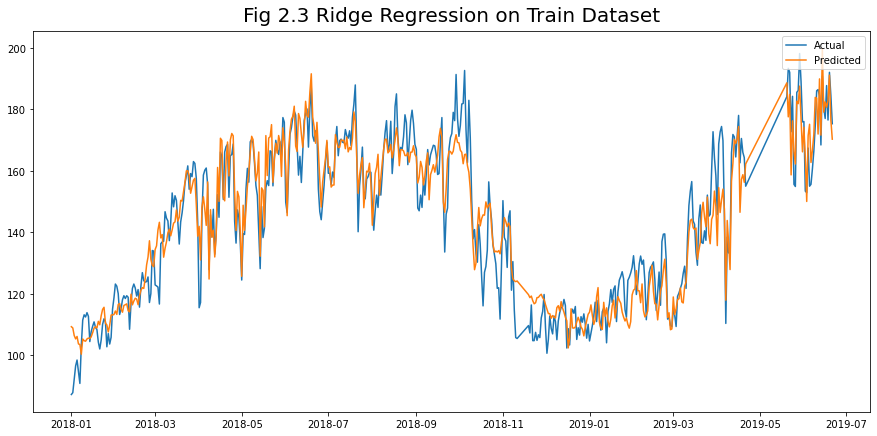

In [154]:
# plot the results
plt.figure(figsize = (15, 7))
plt.title('Fig 2.3 Ridge Regression on Train Dataset',fontsize=20,pad=10)
plt.plot(train_climate.index, train_climate["Consumption"],label='Actual')
plt.plot(train_climate.index, tr_Y_pred ,label='Predicted')
plt.legend(loc="upper right")

In [48]:
vd_X=valid_climate[['avg_max', 'avg_min', 'avg_rain']].values
print(vd_X.shape)
vd_Y = valid_climate[['Consumption']].values[:, np.newaxis].reshape(len(valid_climate),1)
print(vd_Y.shape)

(201, 3)
(201, 1)


In [50]:
w,d = ridge(vd_X.T,vd_Y,4,7)
vd_Y_pred = np.dot(w.T,d).T

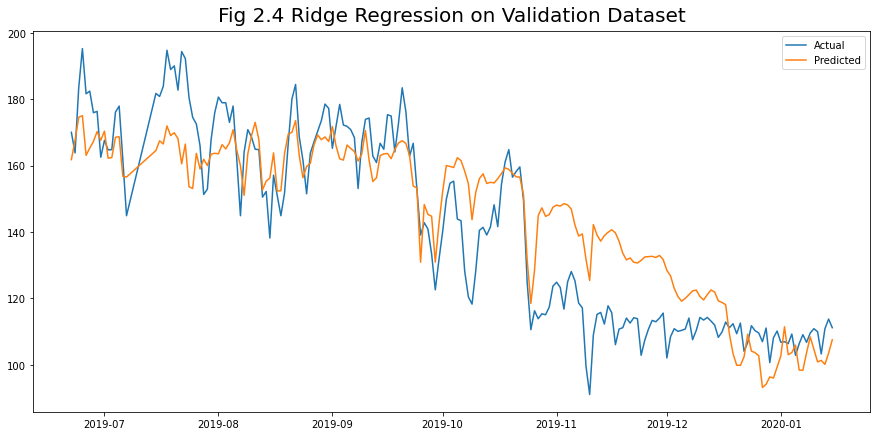

In [155]:
# plot the results
plt.figure(figsize = (15, 7))
plt.title('Fig 2.4 Ridge Regression on Validation Dataset',fontsize=20,pad=10)
plt.plot(valid_climate.index, valid_climate["Consumption"],label='Actual')
plt.plot(valid_climate.index, vd_Y_pred ,label='Predicted')
plt.legend(loc="upper right")

In [53]:
te_X=test_climate[['avg_max', 'avg_min', 'avg_rain']].values
print(te_X.shape)
te_Y = test_climate[['Consumption']].values[:, np.newaxis].reshape(len(test_climate),1)
print(te_Y.shape)

(302, 3)
(302, 1)


In [54]:
w,d = ridge(te_X.T,te_Y,4,7)
te_Y_pred = np.dot(w.T,d).T

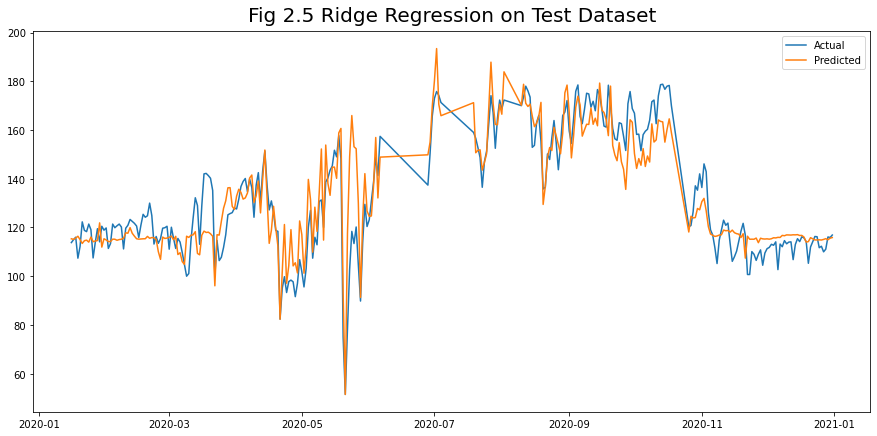

In [156]:
# plot the results
plt.figure(figsize = (15, 7))
plt.title('Fig 2.5 Ridge Regression on Test Dataset',fontsize=20,pad=10)
plt.plot(test_climate.index, test_climate["Consumption"],label='Actual')
plt.plot(test_climate.index, te_Y_pred ,label='Predicted')
plt.legend(loc="upper right")

# OLS using LASSO Regularization

In [84]:
#Using coordinate descent for Lasso regression
def coordinate_descent_lasso(w, X, y, alpha, iters=100000, error=1e-4):
    m, n = X.shape
    X_t = X.T
    for i in range(iters):
        for j in range(n):
            old_w_j = w[j]
            X_j = X_t[j]
            y_pred = X.dot(w)
            grad = X_t.dot(y_pred - y) / m
            z = X_j.dot(y - y_pred + w[j]*X_j)
            threshold = alpha / m
            if z < -threshold:
                w[j] = (z + threshold) / X_j.dot(X_j)
            elif z > threshold:
                w[j] = (z - threshold) / X_j.dot(X_j)
            else:
                w[j] = 0
            # check for convergence
            if abs(w[j] - old_w_j) > error:
                break
        else:
            return w
    return w

In [ ]:
#Generalized function for lasso
def lasso(X,Y,deg,alpha=0.01):
    des=polynomial_combi(tr_X.T, 1)
    w = np.zeros(des.shape[0])
    w = coordinate_descent_lasso(w, des.T, Y.flatten(), alpha=0.001)
    return w

In [140]:
tr_X=train_climate[['avg_max', 'avg_min', 'avg_rain']].values
tr_X.shape

(502, 3)

In [141]:
i1=np.ones((len(train_climate),1))

In [142]:
X = np.hstack([i1,tr_X])
print(X.shape)
Y = train_climate[['Consumption']].values[:, np.newaxis].reshape(len(train_climate),1)
print(Y.flatten().shape)

(502, 4)
(502,)


In [143]:
w=lasso(tr_X,Y,1)
y_pred = des.T.dot(w)
print(w)

[31.4896543  -0.4431782   2.90327769  1.86480666]


In [144]:
#Use Adjusted R-square
rmse=np.power(np.sum((Y-y_pred)**2)/502,0.5)
print("Root mean square error ",rmse)
rsq=1-np.sum((Y-y_pred)**2)/np.sum((Y-np.mean(Y))**2)
print("R-squared ",rsq)

Root mean square error  765.1554028010194
R-squared  -911.8036891115227


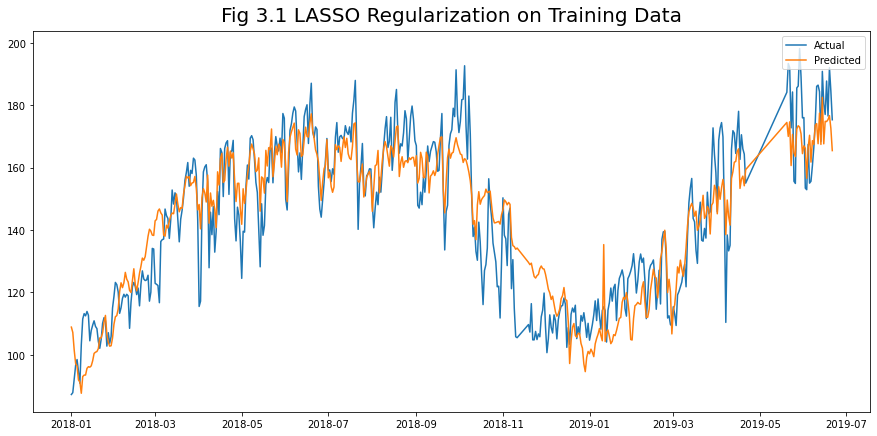

In [145]:
# plot the results
plt.figure(figsize = (15, 7))
plt.title('Fig 3.1 LASSO Regularization on Training Data',fontsize=20,pad=10)
plt.plot(train_climate.index, train_climate["Consumption"],label='Actual')
plt.plot(train_climate.index, y_pred,label='Predicted')
plt.legend(loc="upper right")

In [120]:
vd_X=valid_climate[['avg_max', 'avg_min', 'avg_rain']].values
i1=np.ones(len(valid_climate)).reshape(len(valid_climate),1)
vd_X = np.hstack([i1,vd_X])
vd_Y = valid_climate[['Consumption']].values[:, np.newaxis].reshape(len(valid_climate),1)

In [151]:
w=np.zeros(4)
w=coordinate_descent_lasso(w,X ,Y.flatten(), alpha=0.001)

In [152]:
vd_Y_pred=np.dot(vd_X,w)
rsq=1-np.sum((vd_Y-vd_Y_pred)**2)/np.sum((vd_Y-np.mean(vd_Y))**2)
print("R-squared ",rsq)
rmse=np.power(np.sum((vd_Y-vd_Y_pred)**2)/201,0.5)
print("Root mean squared eror ",rmse)

R-squared  -330.0139997330609
Root mean squared eror  521.4297471942875


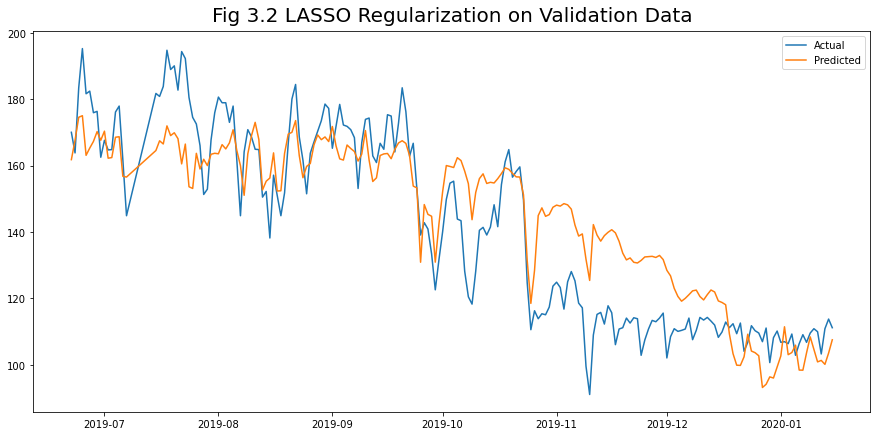

In [153]:
# plot the results
plt.figure(figsize = (15, 7))
plt.title('Fig 3.2 LASSO Regularization on Validation Data',fontsize=20,pad=10)
plt.plot(valid_climate.index, valid_climate["Consumption"],label='Actual')
plt.plot(valid_climate.index, vd_Y_pred,label='Predicted')
plt.legend(loc="upper right")

In [38]:
te_X=test_climate[['avg_max', 'avg_min', 'avg_rain']].values
i1=np.ones(len(test_climate)).reshape(len(test_climate),1)
te_X = np.hstack([i1,te_X])
#print(te_X.shape)
te_Y = test_climate[['Consumption']].values[:, np.newaxis].reshape(len(test_climate),1)
print(te_Y.shape)

(302, 1)


In [39]:
te_Y_pred = np.dot(te_X,w)
#print(te_Y_pred.shape)
rsq=1-np.sum((vd_Y-vd_Y_pred)**2)/np.sum((vd_Y-np.mean(vd_Y))**2)
print("R-squared ",rsq)
rmse=np.power(np.sum((te_Y-te_Y_pred)**2)/302,0.5)
print("Root mean squared error ",rmse)

R-squared  -330.0139997330609
Root mean squared error  588.9705391188727


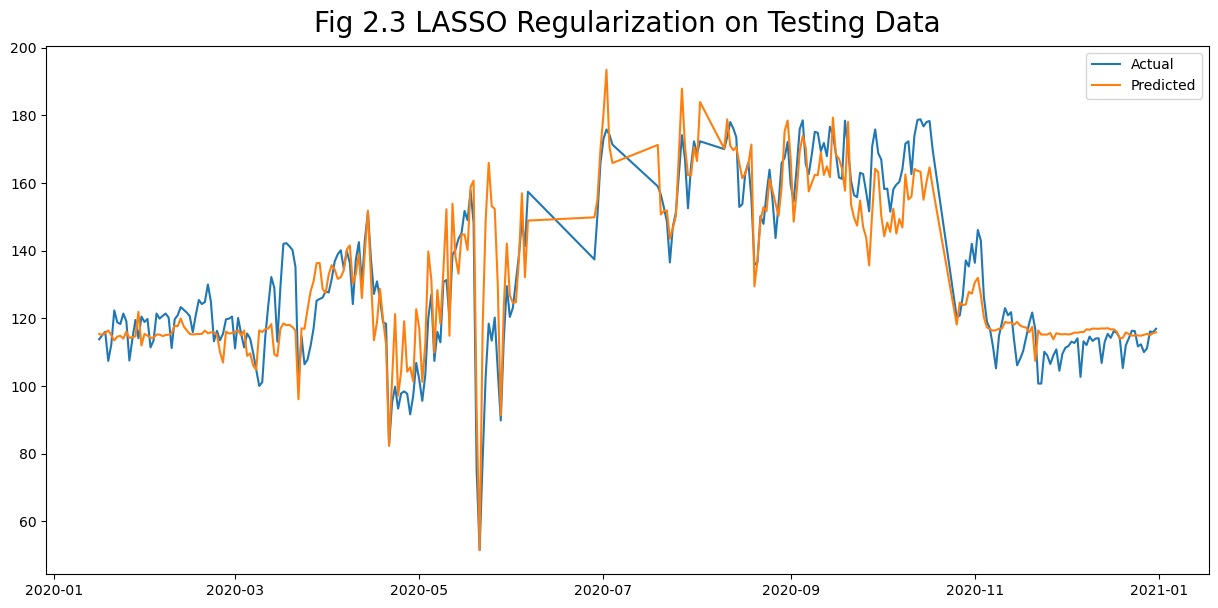

In [112]:
# plot the results
plt.figure(figsize = (15, 7), dpi = 100)
plt.title('Fig 3.3 LASSO Regularization on Testing Data',fontsize=20,pad=10)
plt.plot(test_climate.index, test_climate["Consumption"],label='Actual')
plt.plot(test_climate.index, te_Y_pred,label='Predicted')
plt.legend(loc="upper right")